In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [4]:
bac = pd.read_csv("BAC.csv")
c = pd.read_csv("C.csv")
gs = pd.read_csv("GS.csv")
jpm = pd.read_csv("JPM.csv")
ms = pd.read_csv("MS.csv")
wfc = pd.read_csv("WFC.csv")

tickers = ['bac','c','gs','jpm','ms','wfc']

banks = pd.concat([bac,c,gs,jpm,ms,wfc],axis=1,keys=tickers)

banks.head(5)

bac                                                 c                \
         Date   Open   High    Low  Close    Volume        Date   Open   High   
0  2006-01-03  46.92  47.18  46.15  47.08  16296700  2006-01-03  490.0  493.8   
1  2006-01-04  47.00  47.24  46.45  46.58  17757900  2006-01-04  488.6  491.0   
2  2006-01-05  46.58  46.83  46.32  46.64  14970900  2006-01-05  484.4  487.8   
3  2006-01-06  46.80  46.91  46.35  46.57  12599800  2006-01-06  488.8  489.0   
4  2006-01-09  46.72  46.97  46.36  46.60  15620000  2006-01-09  486.0  487.4   

            ...        ms                                wfc                \
     Low    ...      High    Low  Close   Volume        Date   Open   High   
0  481.1    ...     58.49  56.74  58.31  5377000  2006-01-03  31.60  31.98   
1  483.5    ...     59.28  58.35  58.35  7977800  2006-01-04  31.80  31.82   
2  484.0    ...     58.59  58.02  58.51  5778000  2006-01-05  31.50  31.56   
3  482.0    ...     58.85  58.05  58.57  6889800  2006-01-06  31.58  31.78   
4  483.0    ...     59.29  58.62  59.19  4144500  2006-01-09  31.68  31.82   

                           
     Low  Close    Volume  
0  31.20  31.90  11016400  
1  31.36  31.53  10871000  
2  31.31  31.50  10158000  
3  31.38  31.68   8403800  
4  31.56  31.68   5619600  

[5 rows x 36 columns]

In [5]:
#banks = pd.DataFrame.columns(['Bank Name','Bank Details'])
banks.columns.names = ['Bank Name','Bank Details']
banks.head()

Bank Name            bac                                                 c  \
Bank Details        Date   Open   High    Low  Close    Volume        Date   
0             2006-01-03  46.92  47.18  46.15  47.08  16296700  2006-01-03   
1             2006-01-04  47.00  47.24  46.45  46.58  17757900  2006-01-04   
2             2006-01-05  46.58  46.83  46.32  46.64  14970900  2006-01-05   
3             2006-01-06  46.80  46.91  46.35  46.57  12599800  2006-01-06   
4             2006-01-09  46.72  46.97  46.36  46.60  15620000  2006-01-09   

Bank Name                            ...        ms                         \
Bank Details   Open   High    Low    ...      High    Low  Close   Volume   
0             490.0  493.8  481.1    ...     58.49  56.74  58.31  5377000   
1             488.6  491.0  483.5    ...     59.28  58.35  58.35  7977800   
2             484.4  487.8  484.0    ...     58.59  58.02  58.51  5778000   
3             488.8  489.0  482.0    ...     58.85  58.05  58.57  6889800   
4             486.0  487.4  483.0    ...     59.29  58.62  59.19  4144500   

Bank Name            wfc                                        
Bank Details        Date   Open   High    Low  Close    Volume  
0             2006-01-03  31.60  31.98  31.20  31.90  11016400  
1             2006-01-04  31.80  31.82  31.36  31.53  10871000  
2             2006-01-05  31.50  31.56  31.31  31.50  10158000  
3             2006-01-06  31.58  31.78  31.38  31.68   8403800  
4             2006-01-09  31.68  31.82  31.56  31.68   5619600  

[5 rows x 36 columns]

In [6]:
banks.xs(key='Close',axis=1,level='Bank Details').max()

Bank Name
bac     54.90
c      564.10
gs     247.92
jpm     70.08
ms      89.30
wfc     58.52
dtype: float64

In [7]:
rtn = pd.DataFrame()
#rtn = lambda i,rtn : ((rtn[i+'rtn'] == banks[i]['Close']).pct_change())
#rtn.head()

In [8]:
for i in tickers:
    rtn[i+' rtn'] = banks[i]['Close'].pct_change()
rtn.head()


,bac rtn,c rtn,gs rtn,jpm rtn,ms rtn,wfc rtn
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
3,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
4,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


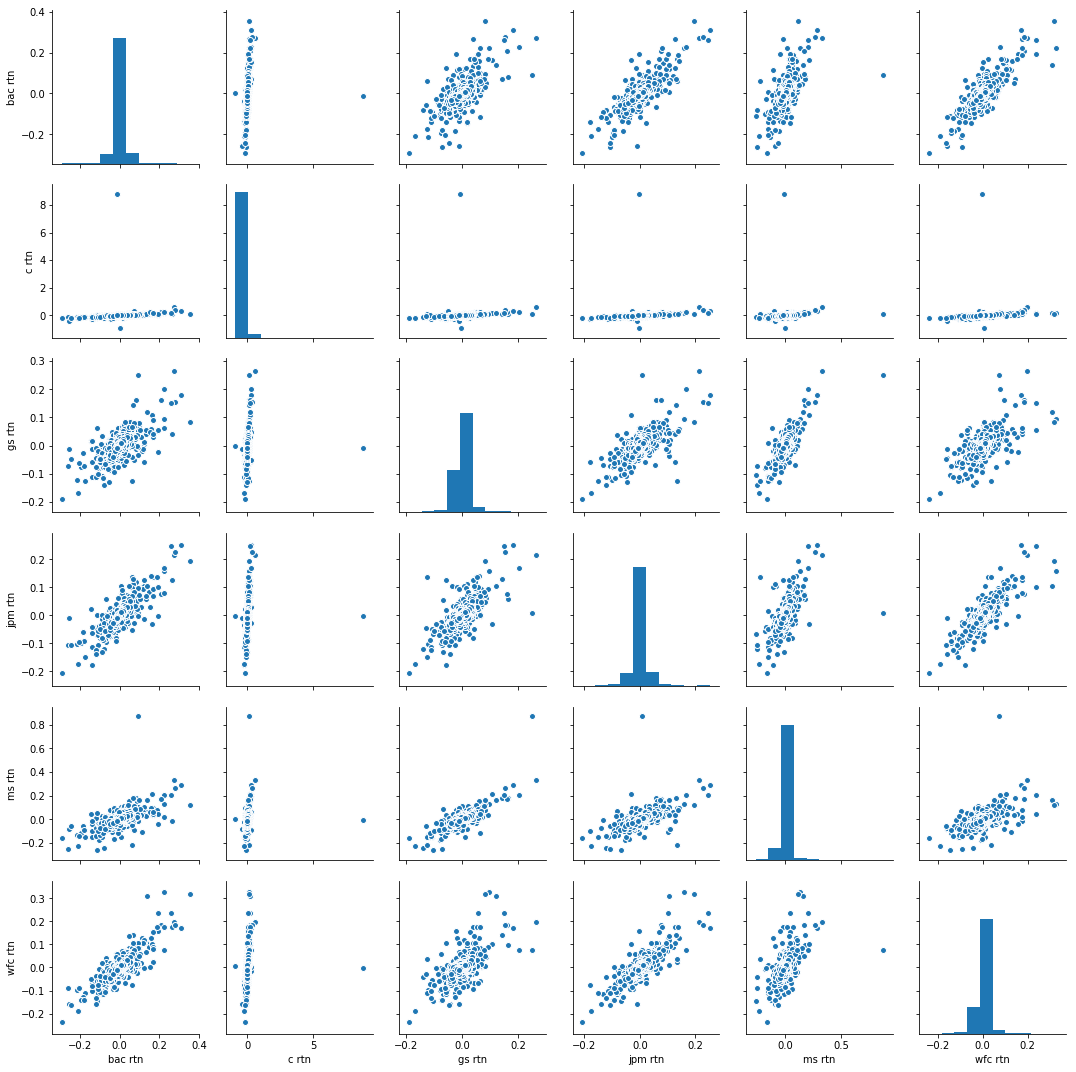

In [14]:
import seaborn as sns
sns.pairplot(rtn[1:])

In [15]:
rtn.idxmin()

bac rtn     766
c rtn      1345
gs rtn      766
jpm rtn     766
ms rtn      697
wfc rtn     766
dtype: int64

In [16]:
rtn.idxmax()

bac rtn     822
c rtn      1346
gs rtn      729
jpm rtn     767
ms rtn      699
wfc rtn     637
dtype: int64

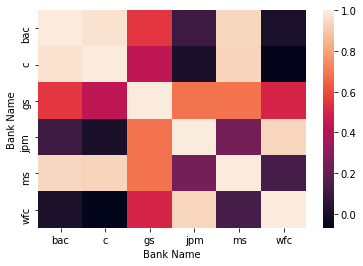

In [17]:
corr = banks.xs(key='Close',axis=1,level='Bank Details').corr()
sns.heatmap(corr)

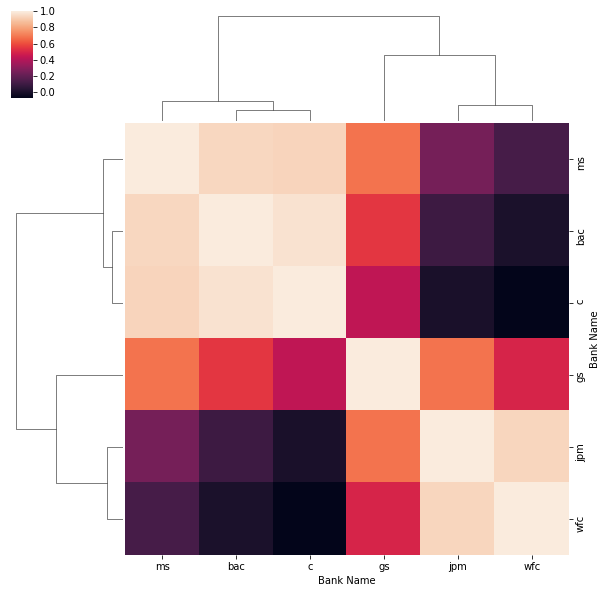

In [18]:
sns.clustermap(corr)